<a href="https://colab.research.google.com/github/elatedgorilla-art/content/blob/main/DATA_342_Fall_2025_Lab_3_Predictive_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openpyxl matplotlib pandas scikit-learn statsmodels


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [4]:
import pandas as pd
import requests

file_id = '1RatOFrajyOyFmEt69TSaAZZTNT3Bjh9c'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'
response = requests.get(url)

if response.status_code == 200:
    with open('DATA 342 Fall 2025 Lab 1.xlsx', 'wb') as f:
        f.write(response.content)
    df = pd.read_excel('DATA 342 Fall 2025 Lab 1.xlsx', sheet_name='Daily Returns 2024', engine='openpyxl')
else:
    print(f"Error downloading file: {response.status_code}")

In [5]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close  Daily Return
0 2024-01-02    CVS      75.03           NaN
1 2024-01-03    CVS      75.06      0.000400
2 2024-01-04    CVS      74.71     -0.004663
3 2024-01-05    CVS      75.56      0.011377
4 2024-01-08    CVS      74.87     -0.009132


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])

In [7]:
cvs_df = df[df['Ticker'] == 'CVS'].copy()
unh_df = df[df['Ticker'] == 'UNH'].copy()

In [8]:
print("\nCVS Health Daily Returns:")
print(cvs_df[['Date', 'Adj Close', 'Daily Return']].head())
print("\nUnited Health Daily Returns:")
print(unh_df[['Date', 'Adj Close', 'Daily Return']].head())


CVS Health Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03      75.06      0.000400
2 2024-01-04      74.71     -0.004663
3 2024-01-05      75.56      0.011377
4 2024-01-08      74.87     -0.009132
5 2024-01-09      74.57     -0.004007

United Health Daily Returns:
          Date  Adj Close  Daily Return
252 2024-01-03     524.35      0.004983
253 2024-01-04     527.63      0.006255
254 2024-01-05     519.85     -0.014745
255 2024-01-08     519.02     -0.001597
256 2024-01-09     520.81      0.003449


/tmp/ipython-input-3950593986.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cvs_df['Daily Return'], unh_df['Daily Return']], labels=['CVS', 'United Health'])


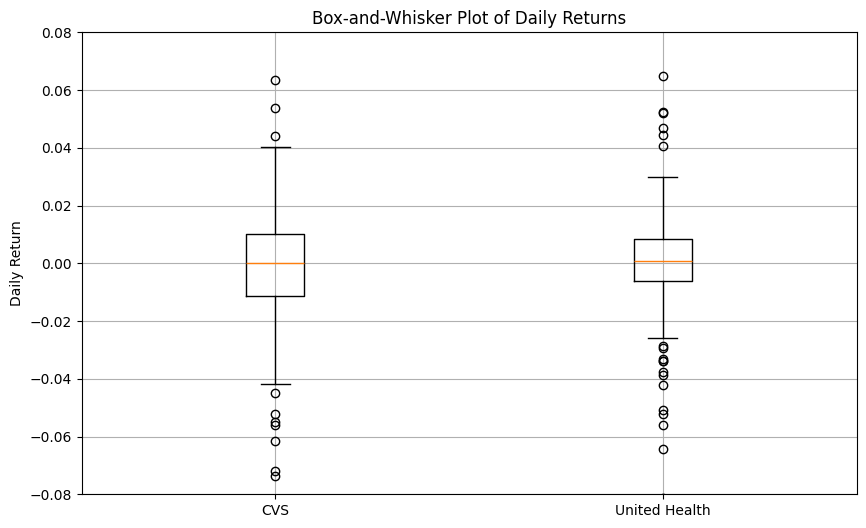

In [9]:
plt.figure(figsize=(10, 6))
plt.boxplot([cvs_df['Daily Return'], unh_df['Daily Return']], labels=['CVS', 'United Health'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.ylim(-0.08, 0.08) # Set the y-axis limits
plt.show()

In [10]:
print("CVS Daily Return column:")
print(cvs_df['Daily Return'].head())
print("\nUnited Health Daily Return column:")
print(unh_df['Daily Return'].head())
print("\nData types of Daily Return columns:")
print("CVS:", cvs_df['Daily Return'].dtype)
print("United Health:", unh_df['Daily Return'].dtype)

CVS Daily Return column:
1    0.000400
2   -0.004663
3    0.011377
4   -0.009132
5   -0.004007
Name: Daily Return, dtype: float64

United Health Daily Return column:
252    0.004983
253    0.006255
254   -0.014745
255   -0.001597
256    0.003449
Name: Daily Return, dtype: float64

Data types of Daily Return columns:
CVS: float64
United Health: float64


In [11]:
from scipy import stats

def descriptive_stats(series):
    stats_dict = {
        'Mean': series.mean(),
        'Standard Error': series.sem(), # Added Standard Error
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else '#N/A', # Handle #N/A for empty mode
        'Standard Deviation': series.std(),
        'Sample Variance': series.var(),
        'Kurtosis': series.kurtosis(),
        'Skewness': series.skew(),
        'Range': series.max() - series.min(),
        'Minimum': series.min(),
        'Maximum': series.max(),
        'Sum': series.sum(), # Added Sum
        'Count': series.count() # Added Count
    }
    return stats_dict

# Compute descriptive statistics
cvs_stats = descriptive_stats(cvs_df['Daily Return'])
unh_stats = descriptive_stats(unh_df['Daily Return'])

print("Descriptive Statistics for CVS Health (CVS):")
for key, value in cvs_stats.items():
    # Check if value is a float before formatting
    if isinstance(value, (float, np.float64)):
        print(f"{key}: {value:.9f}") # Increased precision for floats
    else:
        print(f"{key}: {value}")

# Print the results for UnitedHealth (custom format as requested)
print("\nDescriptive Statistics for UnitedHealth Corp (UNH):")
unh_output_order = [
    'Mean',
    'Standard Error',
    'Median',
    'Mode',
    'Standard Deviation',
    'Sample Variance',
    'Kurtosis',
    'Skewness',
    'Range',
    'Minimum',
    'Maximum',
    'Sum',
    'Count'
]

for key in unh_output_order:
    value = unh_stats.get(key)
    if isinstance(value, (float, np.float64)):
        print(f"{key}: {value:.9f}") # Increased precision for floats
    else:
        print(f"{key}: {value}")

Descriptive Statistics for CVS Health (CVS):
Mean: -0.002006647
Standard Error: 0.001442941
Median: 0.000254604
Mode: -0.168384880
Standard Deviation: 0.022814905
Sample Variance: 0.000520520
Kurtosis: 13.746087915
Skewness: -1.339584475
Range: 0.281842824
Minimum: -0.168384880
Maximum: 0.113457944
Sum: -0.501661778
Count: 250

Descriptive Statistics for UnitedHealth Corp (UNH):
Mean: -0.000030620
Standard Error: 0.001087528
Median: 0.000766551
Mode: -0.081123956
Standard Deviation: 0.017195326
Sample Variance: 0.000295679
Kurtosis: 4.129144161
Skewness: -0.512313613
Range: 0.146119480
Minimum: -0.081123956
Maximum: 0.064995524
Sum: -0.007654889
Count: 250


In [12]:
t_stat, p_value = stats.ttest_ind(cvs_df['Daily Return'], unh_df['Daily Return'], equal_var=False)
print("\nHypothesis Testing (Independent t-test):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis Testing (Independent t-test):
T-statistic: -1.0936162105034082
P-value: 0.27469213587258057


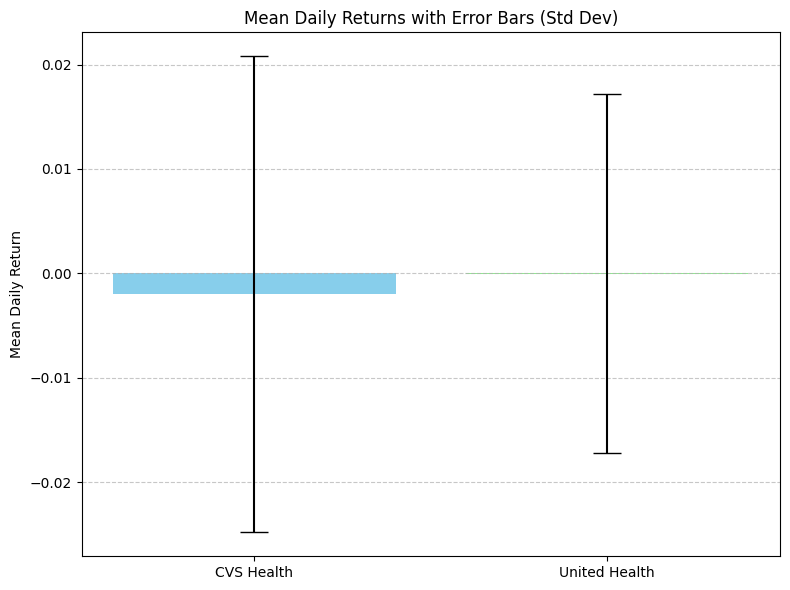

In [13]:
!pip install pandas matplotlib openpyxl scipy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the Excel file from Google Drive or URL
file_path = '/content/DATA 342 Fall 2025 Lab 1.xlsx'  # Update path if needed
df = pd.read_excel(file_path, sheet_name='Daily Returns 2024', engine='openpyxl')

# Clean and filter the data
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])

# Separate CVS and UNH data
cvs_df = df[df['Ticker'] == 'CVS'].copy()
unh_df = df[df['Ticker'] == 'UNH'].copy()

# Compute mean and standard deviation for error bars
mean_cvs = cvs_df['Daily Return'].mean()
std_cvs = cvs_df['Daily Return'].std()
mean_unh = unh_df['Daily Return'].mean()
std_unh = unh_df['Daily Return'].std()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(cvs_df['Daily Return'], unh_df['Daily Return'], equal_var=False)

# Create bar plot with error bars
means = [mean_cvs, mean_unh]
errors = [std_cvs, std_unh]
labels = ['CVS Health', 'United Health']
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=colors)

# Add asterisk if p-value < 0.05
if p_value < 0.05:
    max_height = max(means)
    y = max_height + max(errors) + 0.005
    plt.plot([0, 1], [y, y], color='black')
    plt.text(0.5, y + 0.002, '*', ha='center', va='bottom', fontsize=20)

# Customize plot
plt.title('Mean Daily Returns with Error Bars (Std Dev)')
plt.ylabel('Mean Daily Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
q1_2024_df = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-03-31')].copy()
q1_2024_df = q1_2024_df.sort_values('Date')
q1_2024_df['DayIndex'] = np.arange(len(q1_2024_df))

cvs_2024 = q1_2024_df[q1_2024_df['Ticker'] == 'CVS'].copy()
unh_2024 = q1_2024_df[q1_2024_df['Ticker'] == 'UNH'].copy()


===== CVS Health Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:         Q("Adj Close")   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7567
Date:                Mon, 17 Nov 2025   Prob (F-statistic):              0.388
Time:                        02:16:23   Log-Likelihood:                -128.59
No. Observations:                  60   AIC:                             261.2
Df Residuals:                      58   BIC:                             265.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

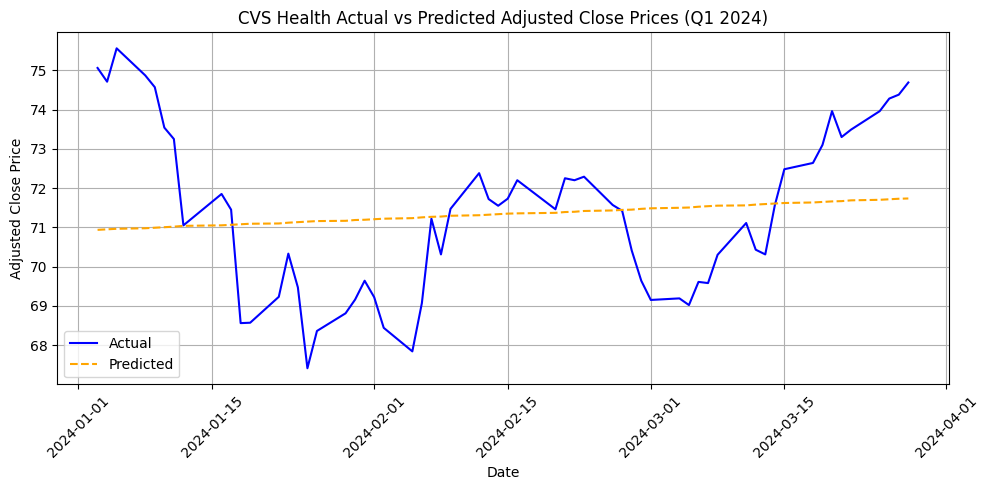

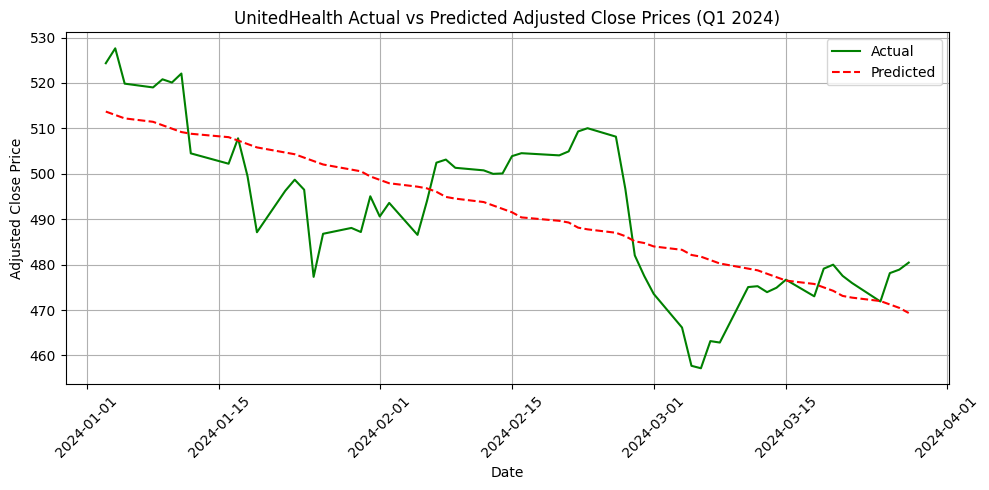

In [15]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

def perform_regression(data, company_name):
    model_sm = smf.ols(formula='Q("Adj Close") ~ DayIndex', data=data).fit()

    print(f"\n===== {company_name} Regression Summary =====")
    print(model_sm.summary())

    anova_table = sm.stats.anova_lm(model_sm, typ=2)
    print("\nANOVA Table:")
    print(anova_table)

    r_square = model_sm.rsquared
    adjusted_r_square = model_sm.rsquared_adj
    multiple_r = np.sqrt(r_square) # Typically sqrt(R-squared) for simple linear regression

    standard_error = np.sqrt(model_sm.mse_resid)


    X = data[['DayIndex']]
    y = data['Adj Close']
    model_sk = LinearRegression()
    model_sk.fit(X, y)
    y_pred = model_sk.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    data['Predicted'] = y_pred

    metrics = {
        'Multiple R': multiple_r,
        'R Square': r_square,
        'Adjusted R Square': adjusted_r_square,
        'Standard Error': standard_error,
        'RMSE': rmse
    }

    return model_sk, data, metrics # Return sklearn model for consistent prediction method

# Run regression for both companies
cvs_model, cvs_2024_with_predictions, cvs_metrics = perform_regression(cvs_2024, 'CVS Health')
unh_model, unh_2024_with_predictions, unh_metrics = perform_regression(unh_2024, 'UnitedHealth')

# Print metrics
print("CVS Health Regression Metrics:")
for key, value in cvs_metrics.items():
    print(f"{key}: {value:.9f}") # Increased precision

print("\nUnitedHealth Regression Metrics:")
for key, value in unh_metrics.items():
    print(f"{key}: {value:.9f}") # Increased precision

# Plot CVS Health actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(cvs_2024_with_predictions['Date'], cvs_2024_with_predictions['Adj Close'], label='Actual', color='blue')
plt.plot(cvs_2024_with_predictions['Date'], cvs_2024_with_predictions['Predicted'], label='Predicted', linestyle='--', color='orange')
plt.title('CVS Health Actual vs Predicted Adjusted Close Prices (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot UnitedHealth actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(unh_2024_with_predictions['Date'], unh_2024_with_predictions['Adj Close'], label='Actual', color='green')
plt.plot(unh_2024_with_predictions['Date'], unh_2024_with_predictions['Predicted'], label='Predicted', linestyle='--', color='red')
plt.title('UnitedHealth Actual vs Predicted Adjusted Close Prices (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Forecasts exported successfully to Q1_2025_Forecasts.xlsx


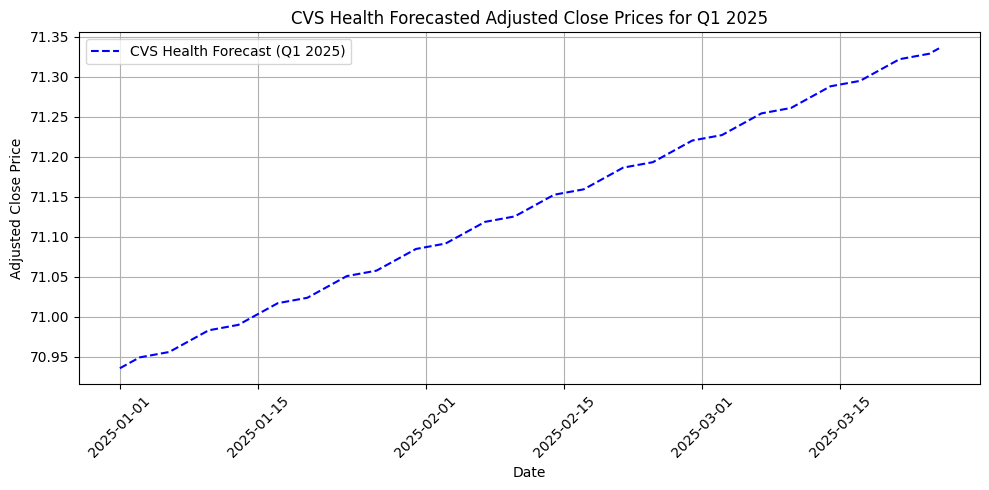

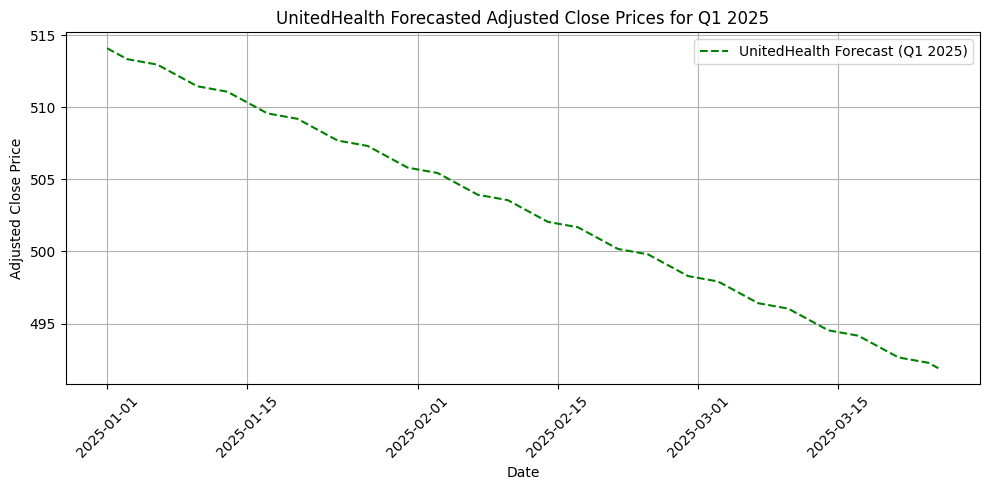

In [16]:
# ARIMA Forecast Q1 2025
forecast_days = len(cvs_2024_with_predictions)
forecast_dates = pd.date_range(start='2025-01-01', periods=forecast_days, freq='B')
cvs_forecast = cvs_model.predict(np.arange(forecast_days).reshape(-1, 1))
unh_forecast = unh_model.predict(np.arange(forecast_days).reshape(-1, 1))

# Create forecast dataframes
cvs_forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Adj Close': cvs_forecast})
unh_forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Adj Close': unh_forecast})

# Export to Excel with two sheets
output_file = 'Q1_2025_Forecasts.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    cvs_forecast_df.to_excel(writer, sheet_name='CVS Health Forecast', index=False)
    unh_forecast_df.to_excel(writer, sheet_name='UnitedHealth Forecast', index=False)

print(f"Forecasts exported successfully to {output_file}")

# Plot CVS Health forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, cvs_forecast, label='CVS Health Forecast (Q1 2025)', linestyle='--', color='blue')
plt.title('CVS Health Forecasted Adjusted Close Prices for Q1 2025')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot UnitedHealth forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, unh_forecast, label='UnitedHealth Forecast (Q1 2025)', linestyle='--', color='green')
plt.title('UnitedHealth Forecasted Adjusted Close Prices for Q1 2025')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()